In [1]:
from google.colab import files
uploaded = files.upload()


Saving superstore_final_dataset (1).csv to superstore_final_dataset (1).csv


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('superstore_final_dataset (1).csv', encoding='latin1')
df.rename(columns=lambda x: x.strip(), inplace=True)

# Quick view
df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [3]:
# Info and basic stats
df.info()
df.describe()

# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Drop or fill missing values (if any)
df.dropna(inplace=True)

# Check duplicates
print("Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

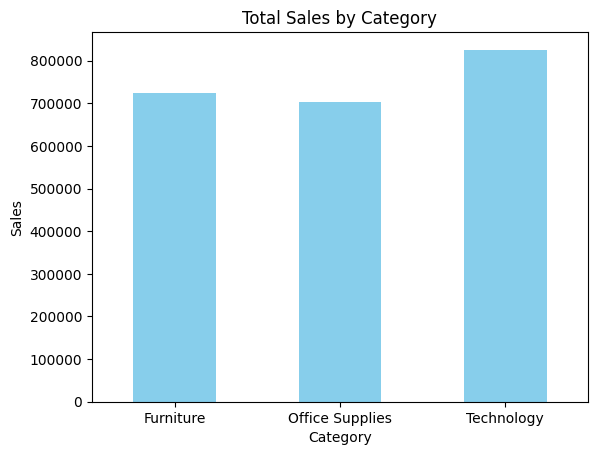

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df.groupby('Category')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.show()


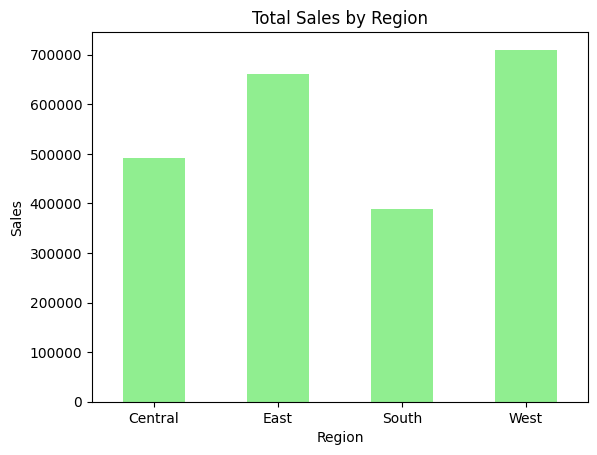

In [5]:
df.groupby('Region')['Sales'].sum().plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()


/tmp/ipython-input-9-2270170909.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Year'] = df['Order_Date'].dt.to_period('M')


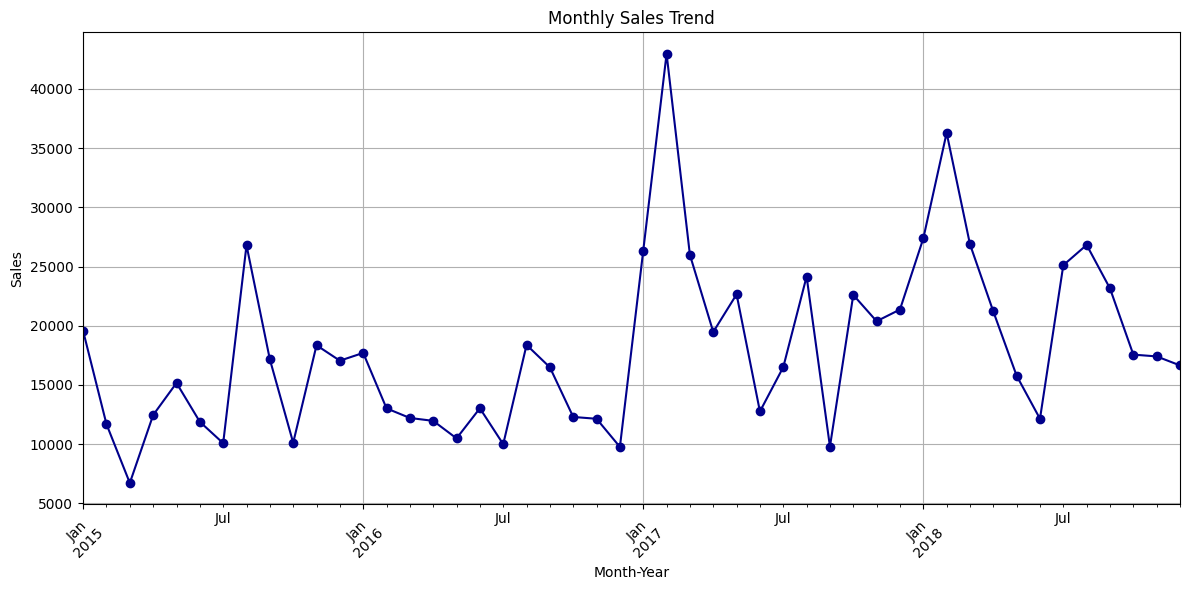

In [9]:
# Convert 'Order_Date' to datetime, handle errors
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Order_Date'])

# Create Month-Year column
df['Month_Year'] = df['Order_Date'].dt.to_period('M')

# Group by Month_Year and sum Sales
monthly_sales = df.groupby('Month_Year')['Sales'].sum()

# Plot
monthly_sales.plot(kind='line', figsize=(12,6), marker='o', color='darkblue')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Simulate Profit (for learning/demo only)
import numpy as np

np.random.seed(42)
df['Profit'] = df['Sales'] * np.random.uniform(-0.3, 0.3, size=len(df))


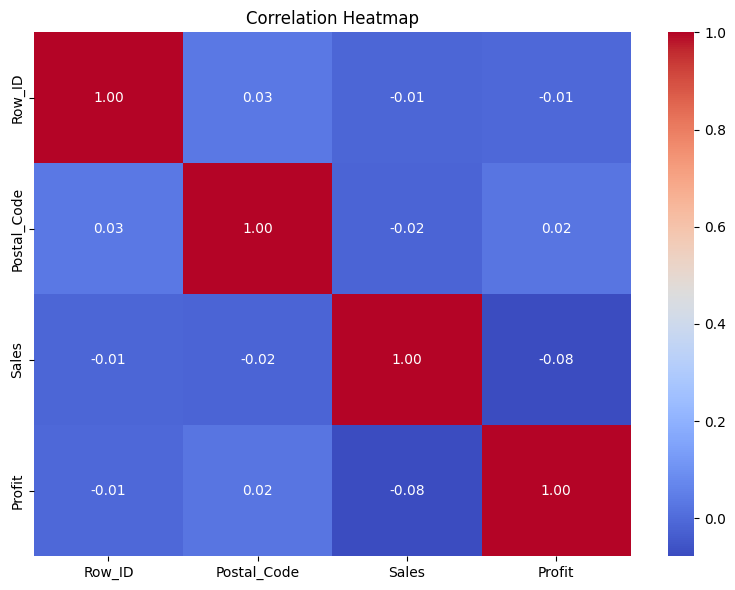

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [15]:
# Step 4.6: Identify products with high sales but low (or negative) profit
if 'Profit' in df.columns:
    # Group by Product Name and aggregate Sales & Profit
    product_perf = df.groupby('Product_Name')[['Sales', 'Profit']].sum()

    # Filter products: high sales (>1000) and negative profit
    underperformers = product_perf[(product_perf['Sales'] > 1000) & (product_perf['Profit'] < 0)]

    # Display bottom 10 underperforming products
    print("🔻 Top 10 Underperforming Products (High Sales, Low Profit):")
    display(underperformers.sort_values(by='Profit').head(10))
else:
    print("⚠️ 'Profit' column not found. Skipping underperforming product analysis.")


🔻 Top 10 Underperforming Products (High Sales, Low Profit):


,Sales,Profit
Product_Name,,
Cubify CubeX 3D Printer Double Head Print,4799.984,-1263.308863
"3D Systems Cube Printer, 2nd Generation, Magenta",5199.960,-1114.218430
Bady BDG101FRU Card Printer,5439.932,-1112.797627
Cubify CubeX 3D Printer Triple Head Print,7999.980,-1024.599428
Global Troy Executive Leather Low-Back Tilter,3607.056,-956.737491
Hon Olson Stacker Chairs,3680.442,-939.716568
GBC DocuBind 300 Electric Binding Machine,4155.242,-880.814055
HP Designjet T520 Inkjet Large Format Printer - 24 Color,8749.950,-829.992547
Hewlett Packard LaserJet 3310 Copier,8159.864,-826.882363
